# Previsão de temperatura com RNN

Imagine que estamos trabalhando em um projeto para uma estação meteorológica que deseja prever a temperatura diária para planejar suas operações. Para isso, utilizaremos uma rede neural recorrente, um tipo de rede neural especialmente adequado para lidar com sequências temporais.

## Importações e Dados

importamos as bibliotecas necessárias. Estamos usando NumPy para trabalhar com arrays, Matplotlib para visualização de dados e Keras para criar e treinar nossa rede neural recorrente (RNN).

Além da geração dados de exemplo que representam temperaturas diárias. O uso de np.random.seed(42) garante que os dados gerados sejam os mesmos sempre que o código for executado, tornando os resultados reproduzíveis.



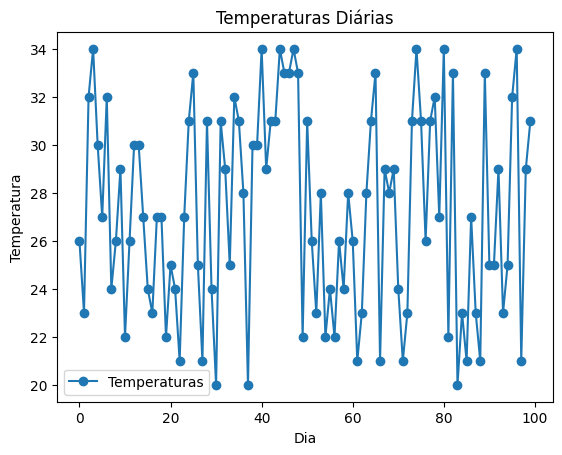


Análise exploratória dos dados:
Média das temperaturas: 27.27
Desvio padrão das temperaturas: 4.230496424770974


In [9]:
# Importações necessárias
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Dados de exemplo (temperaturas diárias)
np.random.seed(42)  # Para garantir a reprodutibilidade dos resultados
temperaturas = np.random.randint(20, 35, size=100)

# Visualizar as temperaturas geradas
plt.plot(range(len(temperaturas)), temperaturas, marker='o', label='Temperaturas')
plt.xlabel('Dia')
plt.ylabel('Temperatura')
plt.title('Temperaturas Diárias')
plt.legend()
plt.show()


# Análise exploratória dos dados gerados
print("\nAnálise exploratória dos dados:")
print("Média das temperaturas:", np.mean(temperaturas))
print("Desvio padrão das temperaturas:", np.std(temperaturas))

## Preparação dos Dados

Processamento do dados para alimentar a RNN. Criamos sequências de temperatura de tamanho timesteps, onde os dados de entrada (X) são as temperaturas dos dias anteriores e o dado de saída (y) é a temperatura do dia seguinte.

In [10]:
# Preparar os dados para a entrada da RNN
timesteps = 3  # Quantidade de passos de tempo para cada entrada
X, y = [], []
for i in range(len(temperaturas) - timesteps):
    X.append(temperaturas[i:i + timesteps])
    y.append(temperaturas[i + timesteps])
X = np.array(X)
y = np.array(y)

# Reshape dos dados para o formato adequado (amostras, passos de tempo, características)
X = X.reshape(X.shape[0], timesteps, 1)

## Criação e Compilação do Modelo

Criação da arquitetura da RNN que consiste em uma camada para capturar as dependências temporais nos dados e uma camada densa de saída para fazer previsões de temperatura.

O modelo é compilado com um otimizador e uma função de perda apropriados para o problema de regressão. Agora, estamos prontos para treinar o modelo com os dados de treinamento.

**model = Sequential()**: Estamos criando um modelo sequencial em Keras. O modelo sequencial é uma pilha linear de camadas, o que significa que as camadas são empilhadas uma após a outra em ordem.

Adição da Camada RNN:

**model.add(SimpleRNN(50, input_shape=(timesteps, 1)))**: Estamos adicionando uma camada RNN simples ao modelo. Esta camada RNN tem 50 unidades (ou neurônios) e espera entradas com a forma (timesteps, 1).
input_shape=(timesteps, 1): Especificamos a forma das entradas para a camada RNN. timesteps representa a quantidade de passos de tempo em cada sequência e 1 indica que há uma única característica (temperatura) em cada passo de tempo.

Adição da Camada Densa de Saída:

**model.add(Dense(1, activation='linear'))**: Após a camada RNN, adicionamos uma camada densa (fully connected) com um único neurônio de saída. A ativação linear (activation='linear') significa que esta camada realiza uma operação de regressão linear para prever a temperatura.

Compilação do modelo:

**model.compile(optimizer='adam', loss='mean_squared_error')**: Aqui, estamos compilando o modelo. Definimos o otimizador como 'adam', que é um otimizador amplamente utilizado em redes neurais. A função de perda (loss function) é definida como 'mean_squared_error' (erro médio quadrático). Isso significa que durante o treinamento, o modelo tentará minimizar a diferença ao quadrado entre as previsões e os valores reais de temperatura. O erro médio quadrático é uma escolha comum para problemas de regressão.

In [11]:
# Criar o modelo da RNN
model = Sequential()
model.add(SimpleRNN(50, input_shape=(timesteps, 1)))
model.add(Dense(1, activation='linear'))

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')


## reinamento do Modelo e Avaliação de Desempenho

Nesta etapa, vamos adicionar um feedback de treinamento para a turma, mostrando a evolução da função de perda ao longo das épocas. Também incluiremos uma avaliação do desempenho do modelo com base em métricas relevantes, como o MSE.

In [12]:
# Treinar o modelo e avaliar o desempenho
history = model.fit(X, y, epochs=100, batch_size=1, verbose=2)
loss = history.history['loss'][-1]
print(f"Erro médio quadrático final do modelo: {loss:.4f}")


Epoch 1/100
97/97 - 2s - loss: 488.3432 - 2s/epoch - 21ms/step
Epoch 2/100
97/97 - 0s - loss: 260.0529 - 245ms/epoch - 3ms/step
Epoch 3/100
97/97 - 0s - loss: 157.0795 - 264ms/epoch - 3ms/step
Epoch 4/100
97/97 - 0s - loss: 93.8844 - 257ms/epoch - 3ms/step
Epoch 5/100
97/97 - 0s - loss: 56.9100 - 290ms/epoch - 3ms/step
Epoch 6/100
97/97 - 0s - loss: 36.5142 - 244ms/epoch - 3ms/step
Epoch 7/100
97/97 - 0s - loss: 26.1722 - 256ms/epoch - 3ms/step
Epoch 8/100
97/97 - 0s - loss: 21.2857 - 254ms/epoch - 3ms/step
Epoch 9/100
97/97 - 0s - loss: 19.2207 - 260ms/epoch - 3ms/step
Epoch 10/100
97/97 - 0s - loss: 18.4405 - 251ms/epoch - 3ms/step
Epoch 11/100
97/97 - 0s - loss: 18.2424 - 259ms/epoch - 3ms/step
Epoch 12/100
97/97 - 0s - loss: 18.1656 - 252ms/epoch - 3ms/step
Epoch 13/100
97/97 - 0s - loss: 18.2115 - 248ms/epoch - 3ms/step
Epoch 14/100
97/97 - 0s - loss: 18.1469 - 256ms/epoch - 3ms/step
Epoch 15/100
97/97 - 0s - loss: 18.0820 - 266ms/epoch - 3ms/step
Epoch 16/100
97/97 - 0s - loss: 1

## Previsão

Vamos explicar o processo de previsão para o próximo dia com base nos últimos 3 dias de temperatura.

In [13]:
# Fazer a previsão para o próximo dia
ultimos_dias = temperaturas[-timesteps:]
entrada_previsao = np.array([ultimos_dias])
entrada_previsao = entrada_previsao.reshape(1, timesteps, 1)
previsao = model.predict(entrada_previsao)
print("Previsão para o próximo dia:", previsao[0][0])


1/1 [==============================] - 0s 184ms/step
Previsão para o próximo dia: 27.419039


## Plotagem dos Resultados

Finalmente, vamos manter a plotagem dos resultados como estava antes, mas adicionaremos um título e rótulos explicativos para os eixos.

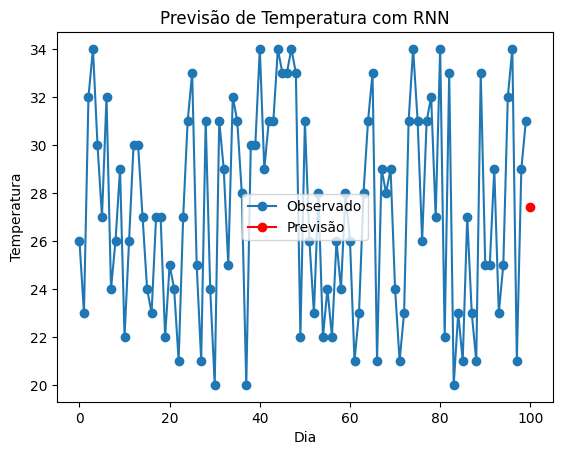

In [14]:
# Plotar os resultados
plt.plot(range(len(temperaturas)), temperaturas, marker='o', label='Observado')
plt.plot(len(temperaturas), previsao[0][0], marker='o', label='Previsão', color='red')
plt.xlabel('Dia')
plt.ylabel('Temperatura')
plt.title('Previsão de Temperatura com RNN')
plt.legend()
plt.show()
